In [24]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
matplotlib.rcParams.update({'font.size': 12})

In [32]:
outpath = "output/gene_expression_vs_SZS/"

In [20]:
datanames = ["HLCA4_P2_10x_with_postprocessing_lung","HLCA4_P3_10x_with_postprocessing_lung"]
name_dict = {x : "HLCA individual {}".format(i) for x, i in zip(datanames,range(1,3))}

In [2]:
dataname = "HLCA4_P2_10x_with_postprocessing_lung"
df = pd.read_parquet("../scripts/output/rijk_zscore/{}_sym_S_0.1_z_0.0_b_5.pq".format(dataname),columns=["cell_gene","n.g","geneR1A_uniq","scZ","z","scaled_z"])

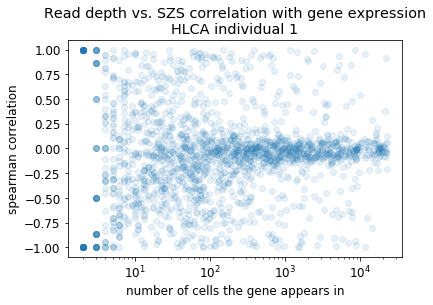

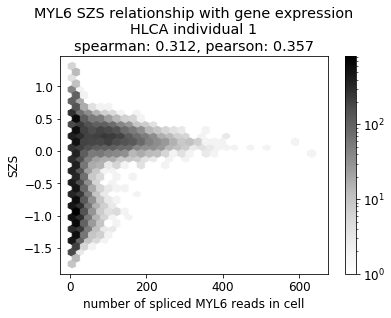

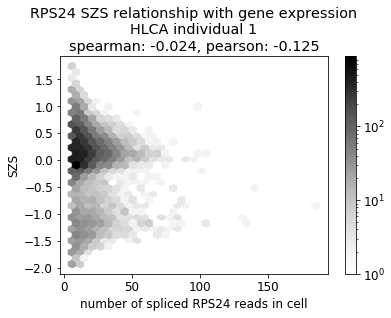

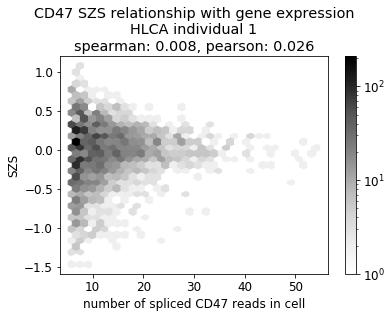

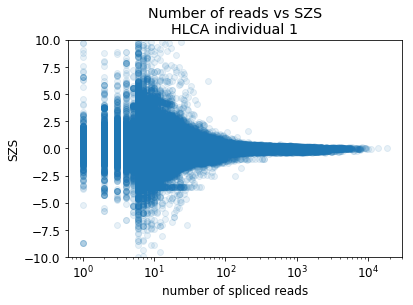

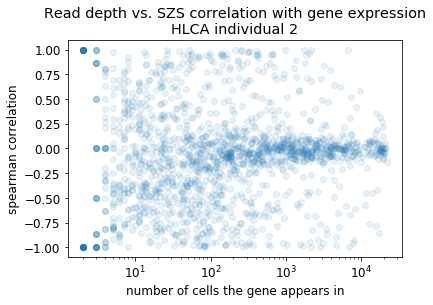

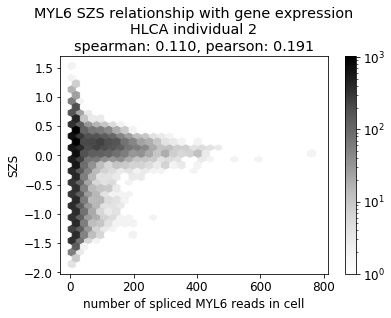

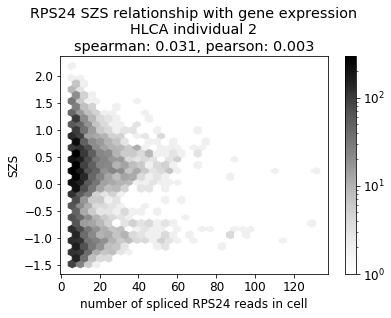

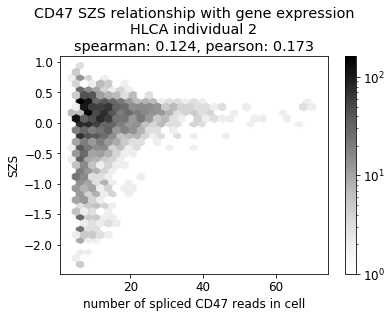

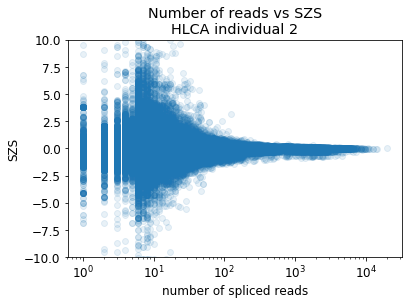

In [33]:
for dataname in datanames:
  df = pd.read_parquet("../scripts/output/rijk_zscore/{}_sym_S_0.1_z_0.0_b_5.pq".format(dataname),columns=["cell_gene","n.g","geneR1A_uniq","scZ","z","scaled_z"])
  df = df.drop_duplicates("cell_gene")
  df = df[~df["geneR1A_uniq"].isin(["SCGB3A1","SCGB1A1"])]
  df = df[~df["geneR1A_uniq"].str.startswith("unknown")]
  corrs = {"gene" : [], "pearson" : [], "spearman" : [], "num cells" : [] }
  for gene, gene_df in df.groupby("geneR1A_uniq"):
    corrs["pearson"].append(gene_df["n.g"].corr(gene_df["z"],method="pearson"))
    corrs["spearman"].append(gene_df["n.g"].corr(gene_df["z"],method="spearman"))
    corrs["gene"].append(gene)
    corrs["num cells"].append(gene_df.shape[0])
  corr_df = pd.DataFrame.from_dict(corrs)
  method = "spearman"
  plt.plot(corr_df["num cells"],corr_df[method],marker="o",linestyle="",alpha = 0.1)
  # plt.colorbar()
  plt.xlabel("number of cells the gene appears in")
  plt.ylabel(method + " correlation")
  plt.xscale("log")
  plt.title("Read depth vs. SZS correlation with gene expression\n{}".format(name_dict[dataname]))
  plt.savefig("{}/numreads_v_corr_{}.png".format(outpath,dataname),bbox_inches="tight")

  plt.show()
  for gene in ["MYL6","RPS24","CD47"]:
    z_col = "scZ"
    # sub_df = df[(df["n.g"] < 1000) & (df["geneR1A_uniq"] == "MYL6")]
    sub_df = df[(df["n.g"] < 1000) & (df["geneR1A_uniq"] == gene)]

    plt.hexbin(sub_df["n.g"],sub_df[z_col],gridsize=30,cmap="Greys",bins="log")
    plt.colorbar()
    plt.xlabel("number of spliced {} reads in cell".format(gene))
    plt.ylabel("SZS")
    plt.title("{} SZS relationship with gene expression\n{}\nspearman: {:.3f}, pearson: {:.3f}".format(gene,name_dict[dataname],sub_df["n.g"].corr(sub_df[z_col],method="spearman"),sub_df["n.g"].corr(sub_df[z_col],method="pearson")))
    plt.savefig("{}/numreads_v_SZS_{}_{}.png".format(outpath,gene,dataname),bbox_inches="tight")

    plt.show()
  plt.plot(df["n.g"],df[z_col],marker="o",linestyle="",alpha = 0.1)
  plt.xscale("log")
  plt.ylim([-10,10])
  plt.xlabel("number of spliced reads")
  plt.ylabel("SZS")
  plt.title("Number of reads vs SZS\n{}".format(name_dict[dataname]))
  plt.savefig("{}/numreads_v_SZS_{}.png".format(outpath,dataname),bbox_inches="tight")
  plt.show()


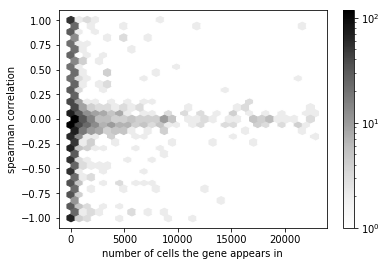

In [9]:
method = "spearman"
plt.hexbin(corr_df["num cells"],corr_df[method],gridsize=30,cmap="Greys",bins="log")
plt.colorbar()
plt.xlabel("number of cells the gene appears in")
plt.ylabel(method + " correlation")
# plt.xscale("log")
plt.show()